<a href="https://colab.research.google.com/github/dpurbosakti/Dicoding_TS_vancouver_temperature/blob/master/Proyek_Kedua_Temperature_Vancouver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
data_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dicoding - ML Pengembangan/sample data/Canadian_climate_history.csv')
data_train = data_train[['LOCAL_DATE', 'MEAN_TEMPERATURE_VANCOUVER']]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_train['LOCAL_DATE'] = data_train['LOCAL_DATE'].str.split(" ").str[0].str.split("-").str[2]
data_train.head()

,LOCAL_DATE,MEAN_TEMPERATURE_VANCOUVER
0,1940,8.9
1,1940,9.7
2,1940,7.8
3,1940,8.1
4,1940,7.0


In [ ]:
data_train.shape

(29221, 2)

In [ ]:
data_train.isna().sum()

LOCAL_DATE                     0
MEAN_TEMPERATURE_VANCOUVER    53
dtype: int64

In [ ]:
data_train['MEAN_TEMPERATURE_VANCOUVER'] = data_train['MEAN_TEMPERATURE_VANCOUVER'].fillna((data_train['MEAN_TEMPERATURE_VANCOUVER'].mean()))
data_train.isna().sum()

LOCAL_DATE                    0
MEAN_TEMPERATURE_VANCOUVER    0
dtype: int64

LOCAL_DATE                     object
MEAN_TEMPERATURE_VANCOUVER    float64
dtype: object

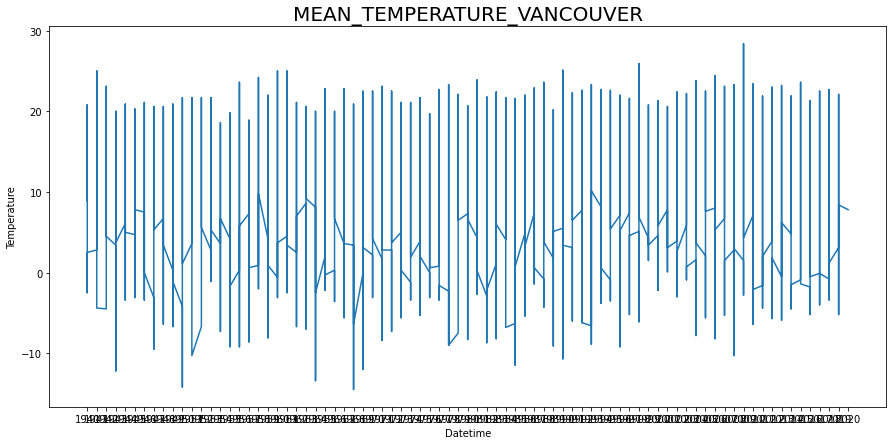

In [ ]:
dates = data_train['LOCAL_DATE'].values
temp = data_train['MEAN_TEMPERATURE_VANCOUVER'].values

dates = np.array(dates)
temp = np.array(temp)

plt.figure(figsize=(15,7))
plt.plot(dates, temp)

plt.title('MEAN_TEMPERATURE_VANCOUVER', fontsize = 20)
plt.ylabel('Temperature')
plt.xlabel('Datetime')

data_train.dtypes

In [ ]:
dates = np.array(data_train['LOCAL_DATE'].values, dtype=np.float)
temp = data_train['MEAN_TEMPERATURE_VANCOUVER'].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dates, temp, test_size=0.2, random_state = 0 , shuffle=False)

In [ ]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[-1:]))
    return ds.batch(batch_size).prefetch(1)

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(23376,) (5845,) (23376,) (5845,)


In [ ]:
from tensorflow.keras import layers
train_set = windowed_dataset(X_train, window_size=60, batch_size=100, shuffle_buffer=1000)
val_set = windowed_dataset(X_test, window_size=60, batch_size=100, shuffle_buffer=5000)
model = tf.keras.models.Sequential([
  layers.Bidirectional(layers.LSTM(128, return_sequences=True)),
  tf.keras.layers.LSTM(60),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(60, activation="relu"),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(1),
])

In [ ]:
from keras.callbacks import ModelCheckpoint
checkpoint1 = ModelCheckpoint("best_model1.hdf5", monitor='val_mae', verbose=1,save_best_only=True, mode='auto', period=1,save_weights_only=False)

In [ ]:
optimizer = tf.keras.optimizers.SGD(learning_rate=1.0000e-04, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set, batch_size=128, epochs=30, validation_data=val_set, callbacks=[checkpoint1])

Epoch 1/30
234/234 [==============================] - 18s 32ms/step - loss: 1965.0317 - mae: 1965.5319 - val_loss: 1980.3275 - val_mae: 1980.8275

Epoch 00001: val_mae improved from inf to 1980.82751, saving model to best_model1.hdf5
Epoch 2/30
234/234 [==============================] - 6s 26ms/step - loss: 673.2738 - mae: 673.7733 - val_loss: 30.4270 - val_mae: 30.9270

Epoch 00002: val_mae improved from 1980.82751 to 30.92697, saving model to best_model1.hdf5
Epoch 3/30
234/234 [==============================] - 6s 27ms/step - loss: 100.7100 - mae: 101.2090 - val_loss: 54.3786 - val_mae: 54.8786

Epoch 00003: val_mae did not improve from 30.92697
Epoch 4/30
234/234 [==============================] - 6s 27ms/step - loss: 96.8928 - mae: 97.3916 - val_loss: 44.2781 - val_mae: 44.7781

Epoch 00004: val_mae did not improve from 30.92697
Epoch 5/30
234/234 [==============================] - 6s 27ms/step - loss: 95.6032 - mae: 96.1020 - val_loss: 5.3495 - val_mae: 5.8256

Epoch 00005: val_m

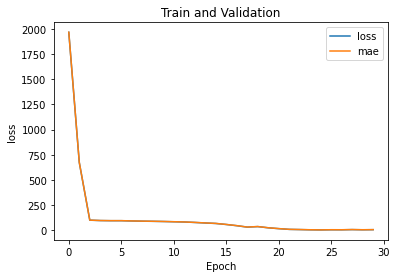

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['mae'], label='mae')
plt.title('Train and Validation')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

Dwi Atmoko Purbo Sakti [profile dicoding](https://www.dicoding.com/users/dwi_atmoko)